### [参考笔记](https://github.com/shazhongcheng/machine_learing_study/tree/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%AE%9E%E6%88%98%E4%B8%80)

# 端到端的机器学习项目

##### 模拟项目：
假设你是一个房地产公司最近新雇佣的数据科学家，以下是我们会经历的主要步骤：

1. 观察大局
1. 获得数据
1. 从数据探索和可视化中获得洞见
1. 机器学习算法的数据准备
1. 选择和训练模型
1. 微调模型
1. 展示解决方案
1. 启动、监控和维护系统

# 使用真实的数据
书中建议学习机器学习最好使用真实的数据集，而不是人造数据集。
- 流行的开放数据存储库：
* [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
* [Kaggle datasets](https://www.kaggle.com/datasets)
* [Amazon's AWS datasets](https://registry.opendata.aws/)
<br>元门户站点(会列出开发的数据存储库):
* (http://dataportals.org/)
* (https://www.opendatamonitor.eu/)
* (https://www.quandl.com/)
<br>其他一些列出许多流行的开放数据存储库的页面：
* (https://www.datasetlist.com/)
###### 本章从StatLib数据库选择加州房价数据集，基于1990年加州人口普查的数据，出于教学的目的，添加了一个分类属性，并且移除了一些特征

# 观察大局
你需要通过加州人口普查的数据建立加州数据模型，从而能够根据所有其他指标，预测任意区域的房价中位数<br>
PS:数据来源的网站已经上不去了，从书本作者GitHub下不下来。最后费尽千辛万苦才找到。😭吐了。。。。。。<br>
数据在datas目录下

# 框架问题
### 询问两个问题：
1. 询问业务目标是什么，公司如何使用这个模型，如何从中获益。
这决定了我们会怎么设定问题，选择什么算法，使用什么测量方式来评估模型的性能，以及该花多少力气来进行调整
- 回答：这个模型的输出(对一个区域房价中位数的预测)将会和其他许多信号一起被传输到另一个学习系统，下游系统会据此决策一个给定的区域是否值得投资。这会直接影响收益，因而正确获得这个信息至关重要。
2. 当前解决方案(如果有的话)，是什么。
可以用来当做参考，也能获得解决问题的洞察。
- 回答：目前由一个专家团队手动估算区域的住房价格，一个团队持续收集最新的区域信息(不包括房价中位数),然后使用复杂的规则来进行估算。既昂贵又耗时，而且还不准，显著误差率高达15%

# 选择性能指标
- 接下来要选择一个性能指标。回归问题的典型性能衡量指标是均方根误差(RMSE),他测量的是预测过程中，预测错误的标准偏差。
$$RMSE(X,h)=\\sqrt{\\frac{1}{m}\\sum_{i=1}^{m}(h(X^{(i)})-y^{(i)})^2}$$
- 当有很多离群区域时，可以考虑使用平均绝对偏差。
$$MAE(X,h)=\\frac{1}{m}\\sum_{i=1}^{m}|h(X^{(i)})-y^{(i)}|$$
* * 包含n个元素的向量Vk的范数可以定义为
$$||V||_k=(|v_0|^k+|v_1|^k+....+|v_n|^k)^{\\frac{1}{k}}$$

# 检测假设
提出假设是一个非常好的习惯；这可以在初期检查出严重的问题。(书本的汉化不好理解，应该是这个意思)
- 例如：我们假设是价格会被下游系统使用，但如果下游系统需要将价格转换为类别(比如：廉价、中等或者昂贵)，转而使用类别而不是价格本身。这时候并不需要完全准确的预估价格，只需要给出正确的类别就够了。

# 获取数据
已经下下来了，在datas文件夹下

# 创建工作区
事先以创建，跳过（狗头保命）
- 安装python/直接装conda也行
- 创建代码工作区（都是说推荐隔离环境）
- 安装需要运行的包（conda环境自带一部分）
- 运行jupyter

# 下载数据
下载方式(我直接导本地)：

In [1]:
import pandas as pd  #导入本地数据
housing = pd.read_csv("./datas/housing.csv")   #数据在当前目录下datas文件夹下

# 快速查看数据结构

In [2]:
housing.head(5)   #前五行

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()   #简单描述

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [2]:
housing["ocean_proximity"].value_counts() # 查看非数字字段（只有靠海数据是）有多少分类存在，每个分类数量

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe() #各列（属性）统计结果，describe()会自动忽略非数字列

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


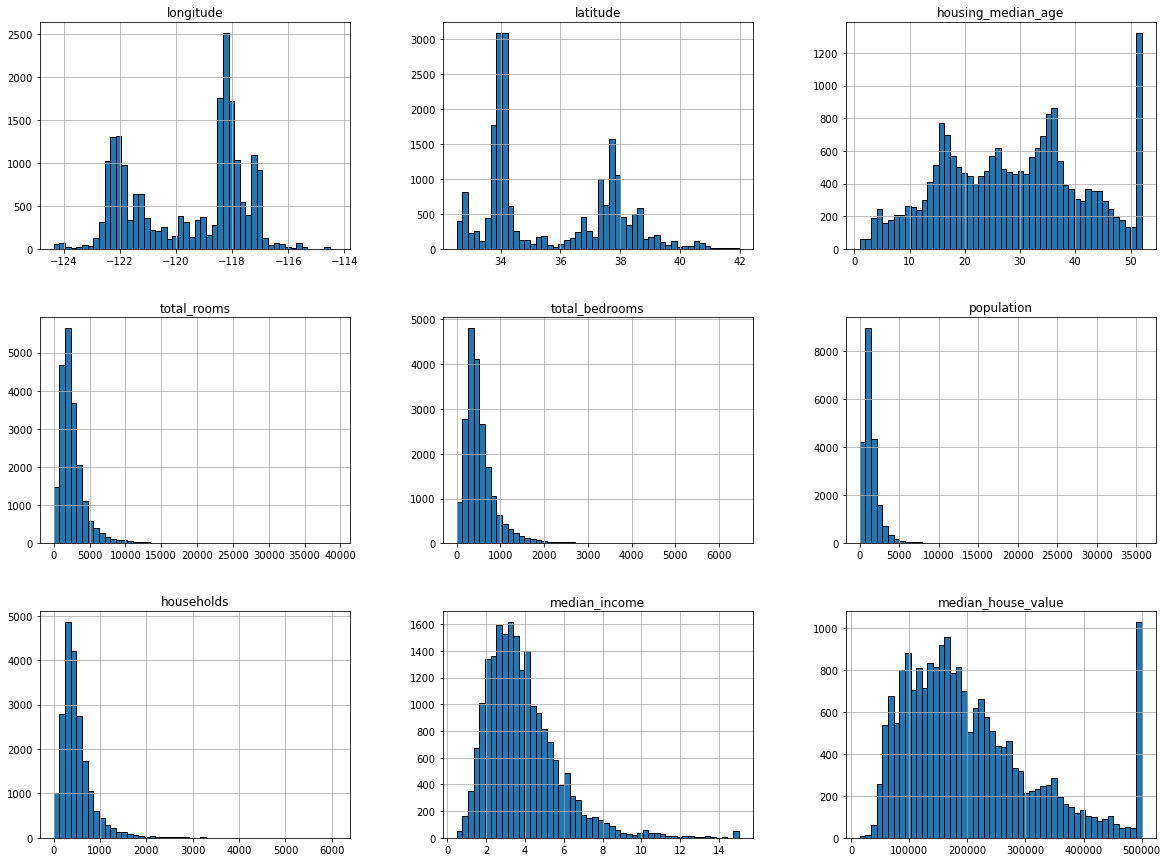

In [6]:
# 绘制每个属性属性的直方图
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15),edgecolor="black")
plt.show()

##### 回到直方图，请注意以下几点
1. 首先收入中位数这个属性看起来不像是用美元(USD)在衡。通过与收集数据的团队核实，得知数据已经按比例缩小，并框处中位数的上限为15，下限为0.5.在机器学习中，使用经过预处理的属性是很常见的事情，倒不一定是个问题，但是至少要了解数据是如何计算的。
1. 房龄中位数和房价中位数也被设定了上限，而后者正是我们需要的目标属性(标签),这是个问题，因为这样机器学习算法很可能永远也学不到超过这个上限的价格。因此，需要继续和客户进行核实，查看是否存在问题。如果他们说，需要精确的预测值，甚至会超过50w美元。那么，我们通常有两个选择： 对被设置了上限的区域，重新收集标签值。或是将这些区域的数据从训练集中移除(包括从测试中移除，因为如果预测值超过50w,系统不应该被评估为不良)
1. 这些属性的缩放程度各不相同，在本章后续探索特征的缩放时，再做讨论。
1. 最后，很多直方图都表现出重尾：图形在中位数右侧会比左侧要远得多。这可能会导致某些机器学习算法难以检测模式。稍后我们会尝试一些转化方法，将这些属性转化为更偏向于钟形的分布

# 创建测试集/训练集
理论上，创建测试集非常简单(书本作者说的)：只需随机选择一些实例，通常是数据的20%，剩余80%就作为训练集

In [7]:
#先自己做一个函数了解原理
import numpy as np   #导入numpy
np.random.seed(42)    #设置随机数种子

#这个函数sklearn有自带一个功能相近的，原理类似
def split_train_test(data,test_ratio=0.2):   #传入数据，与测试集比例（默认20%），返回训练集与测试集
    shuffled_indices=np.random.permutation(len(data))  #0-数据长度的array
    test_set_size=int(len(data)*test_ratio)    #测试集的长度
    test_indices=shuffled_indices[:test_set_size]   #划分测试集
    train_indices=shuffled_indices[test_set_size:]   #划分训练集
    return data.iloc[train_indices],data.iloc[test_indices]  #返回训练集与测试集

In [8]:
train_set,test_set=split_train_test(housing,0.2)  #传入数据
print(len(train_set),"train+",len(test_set),"test")   #输出长度

16512 train+ 4128 test


- 设置随机数种子的方法可以使得每次随机分配的结果都一样，不然的话随着运行的次数增加，你的的机器学习算法终将看到所有的数据
- 或者你可以把分配好的数据保存下列，下次只需加载保存的数据
- 但这两种方法在下次获取更新数据的时候会中断，常见的方法是每个实例都加上一个标识符，用标识符来决定该分到训练集还是测试集：例如先计算HASH，根据HASH的最后字节来放置数据，这样可以保证每次运行的数据的训练集和测试集是一样的,不过本数据集没有标识符列。

In [9]:
#sklearn自带的函数
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)  #传入数据，测试集比例，随机数种子
print(len(train_set),"train+",len(test_set),"test")

16512 train+ 4128 test


#### ⚠以上这两种纯随机抽样比较适合用于大量数据时，若面对小样本数据，就容易产生偏差，因此需要考虑分层抽样

<AxesSubplot:>

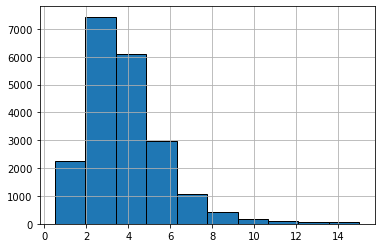

In [10]:
housing["median_income"].hist(edgecolor="black")

观察到，大多数收入的中位数在2~5万元，有一部分超过了6万，我们在分层的时候，应该保证每层都有足够的数据，以免部分数据不够的层被错估。

<AxesSubplot:>

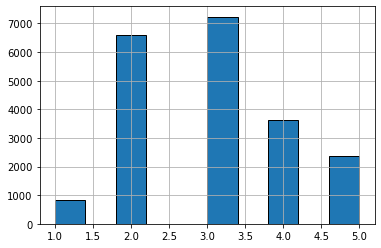

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],   #分组
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist(edgecolor="black")

该代码是以中位数除1.5然后取整用来分组，将所有大于5万元的合并成第5组

In [12]:
# 根据收入进行分层抽样
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    print(len(strat_train_set),len(strat_test_set))  #输出训练集与测试集长度

16512 4128


In [13]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)  #各个分组的比例分布

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [14]:
# 比较分层抽样和随机抽样，测试集的样本比例分布和完整数据集的差异
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "真实数据": income_cat_proportions(housing),
    "纯随机的预判": income_cat_proportions(test_set),
    "分成的预判": income_cat_proportions(strat_test_set),
}).sort_index()
compare_props["纯随机偏差"] = 100 * compare_props["纯随机的预判"] / compare_props["真实数据"] - 100
compare_props["分层抽样偏差"] = 100 * compare_props["分成的预判"] / compare_props["真实数据"] - 100
compare_props

,真实数据,纯随机的预判,分成的预判,纯随机偏差,分层抽样偏差
1,0.039826,0.040213,0.039729,0.973236,-0.243309
2,0.318847,0.324370,0.318798,1.732260,-0.015195
3,0.350581,0.358527,0.350533,2.266446,-0.013820
4,0.176308,0.167393,0.176357,-5.056334,0.027480
5,0.114438,0.109496,0.114583,-4.318374,0.127011


In [15]:
# 删除 income_cat 属性  （还原数据集）
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 从数据探索和可视化中获得洞见
先将测试集放一边，先来探索训练集，用于训练集过于庞大，我们可以抽样一个探索集
- 首先创建一个副本，这样可以随便尝试，而不用担心训练集被破坏

In [16]:
housing=strat_train_set.copy()

In [17]:
'''中文会有乱码，先换个字体'''
plt.rcParams['font.sans-serif'] = ['SimHei']  #更改一个有中文的字体
plt.rcParams['axes.unicode_minus']=False  #解决符号不显示问题

# 将地理数据可视化
数据中存在经纬度信息，所以我们可以建立一张散点图

<AxesSubplot:title={'center':'数据的地理分布图'}, xlabel='longitude', ylabel='latitude'>

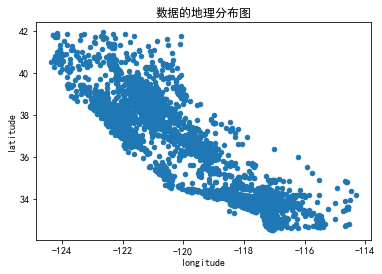

In [18]:
housing.plot(kind="scatter",x="longitude",y="latitude",
            title="数据的地理分布图")

<AxesSubplot:title={'center':'突出高密度区域的可视化'}, xlabel='longitude', ylabel='latitude'>

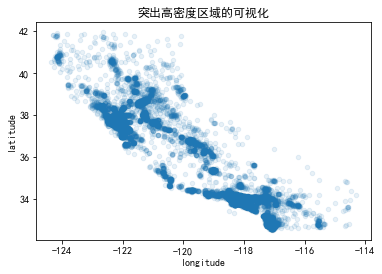

In [19]:
# 将alpha设为0.1，更容易看出高密度点的位置
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,
             title="突出高密度区域的可视化")

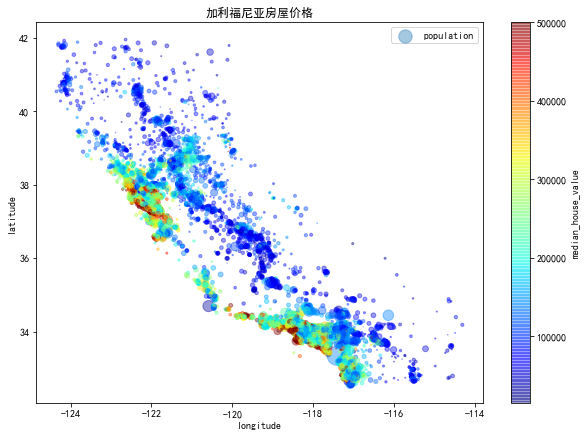

In [20]:
# 更容易看出高密度点的位置
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
             s=housing["population"]/100,label="population",figsize=(10,7),
             c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,
             sharex=False,
             title="加利福尼亚房屋价格")
plt.legend()

# 寻找相关性
由于数据不大，你可以使用 corr() 在不大数据集上计算没对属性间的标准相关系数（也称为皮尔逊相关系数）

In [21]:
corr_matrix=housing.corr()

In [22]:
# 越接近1和-1 越相关，0代表没有线性关系
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

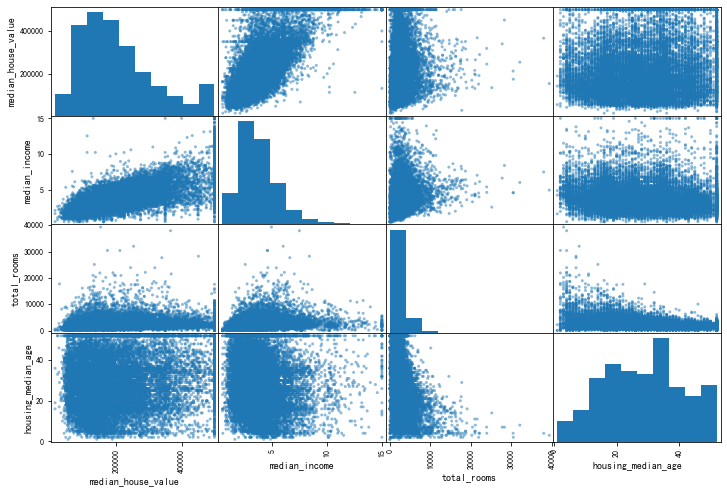

In [23]:
#每个数值属性相对于卡属性的相关性
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes],figsize=(12,8))

(0.0, 16.0, 0.0, 550000.0)

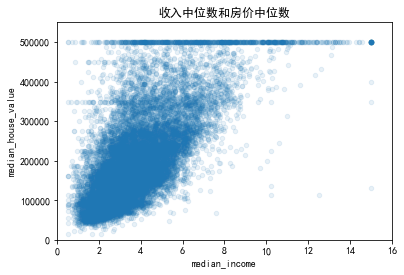

In [24]:
#最有潜力预测房价中位数是收入中位数，单独查看一个图表
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1,title="收入中位数和房价中位数")
plt.axis([0, 16, 0, 550000])

# 实验不同属性的组合
- 在准备给机器学习的算法输入数据之前，我们可能已经识别出了一些异常数据，需要提前清理掉
- 同时，也发现不同属性间的某些有趣的联系，特别是跟目标属性相关的联系
- 再有，某些数据的分布有明显的"重尾"分布，因此还需要对这些数据做转换处理(比如计算其对数)
- 在准备机器学习之前，你要做的最后一件事应该是尝试各种参数的组合，以本项目为例，如果不知道一个地区有多少个家庭，那么知道一个地区的“总房屋数”也没什么用。我们真正想知道的是一个家庭的房屋数量。
- 同样，但看“卧室总数”这个属性本身，也没有什么意义，我们可能是想拿它和“房屋总数”来对比，或者拿来同“每个家庭的人口数”这个属性结合也似乎挺有意思

In [25]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [26]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

显然，新的bedrooms_per_room较“房屋总数”还是“卧室总数”与房价中位数的相关性都要高得多。显然卧室/房屋比例更低的房屋，往往价格越贵。
同样“每一个家庭的房间数量”也比“房间总数”更具信息量--房屋越大，价格越贵

# 机器学习算法都数据准备
这里你应该编写函数来执行，而不是手动操作，原因如下：
1. 可以在任何数据集上轻松重现这些转换(例如，更新数据库之后)
1. 逐渐建立起一个轻松转换函数的函数库，在以后的项目中可以重用
1. 可以在实时系统中使用这些函数来转换新数据，在"喂"给算法
1. 可以轻松尝试多种转换方式，查看哪种转换的组合效果最佳

In [27]:
# 先回到一个干净的数据集，然后将预测器和标签分开，因为可能使用不同的转换方式
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

## 数据清洗
(也可参考Pandas数据清洗笔记)

大部分机器学习算法无法在缺失的特征上工作,所以我们要创建一些函数来辅助它。 前面我们已经注意到total_bedrooms属性有部分值缺失，所以需要解决。 有以下三种选择
1. 放弃这些相应的地区
1. 放弃这个属性
1. 将缺失值设置为某个值

In [28]:
# 缺失属性的数据（行中包含null数据,isnull()方法将返回False）
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [29]:
# 方法一
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # 删除空值行

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [30]:
# 方法二
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # 删除空值列（这方法有点狠）

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [31]:
# 方法三，用中位数填充
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


### sklearn提供了一个非常容易上手的方法处理缺省值：impute

In [32]:
from sklearn.impute import SimpleImputer   #导入
imputer = SimpleImputer(strategy="median")   #首先你需要创建一个imputer实例
# 移除文本值
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)   #将imputer适配到新的训练集

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_  #imputer不仅仅只是计数了中位数值，还将其保存在statistics_属性中

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [34]:
# 空值替换
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


# 处理文本和分类属性
之前我们排除了ocean_proximity,因为这是一个文本属性，无法计算中位数值。大部分机器学习算法都更容易和数字打交道，所以我们先将这些文本标签化为数字。
- sklearn为这类任务提供了一个转换器LabelEncoder:

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encofed = encoder.fit_transform(housing_cat)
housing_cat_encofed

array([0, 0, 4, ..., 1, 0, 3])

In [36]:
#可以使用encoder.classes_查看编码对应的映射
encoder.classes_   #例如<1H OCEAN对应0, INLAND对应1

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

这种代表方式存在一个问题，机器总是认为两个相近的数字比两个远的数字更相近，然而事实并非如此，为解决这个问题，我们可以给每个类别创建一个独热编码

In [37]:
#sklearn自带一个独热编码器，可以将整数分类转化成独热编码
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()  #实例化
housing_cat_1hot = encoder.fit_transform(housing_cat_encofed.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [38]:
#输出的是一个SciPy稀疏矩阵，看不懂？？没关系！我们可以把它转化成numpy.array
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

#### 直接使用LabelBinarizer类可以直接完成上面所有操作

In [39]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()  #实例化
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

# 自定义转换器
虽然sklearn提供了许多有用的转化器，但仍然需要一些自定义的转化器

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

# 特征缩放（归一化）
特征缩放时最重要也最需要应用到数据上的转换器，就是特征缩放，如果输入的数值属性具有非常大的比例差异，往往导致机器学习算法的表现性能不佳，当然也有极少数特例。案例中的房屋数量就是如此，从6到39320，二收入中位数的范围是0到15。
<br>同比例缩放所有属性，常用的两种方法是:最小-最大缩放和标准化
* 最小-最大缩放很简单，就是如下，sklearn提供了MinMaxScaler的转换器，如果不想缩放到0-1，也可以通过超参数来控制
$$x=\\frac{x-min}{max-min}$$
* 标准化则不一样，首先减去均值，然后除以方差，从而使结果具有单位方差。标准化的方法受异常值的影响更小，不过不将值绑定到0-1。Sklearn提供了StandadScaler来处理
<br>可以参考：https://zhuanlan.zhihu.com/p/25234554

# 转换流水线(管道)
Sklearn提供了Pipeline来使准换器按照正确的顺序来执行，除最后一个是估算器之外，前面必须是转换器(也就是说必须有fit_transform方法，至于命名，可以随意，喜欢就好)
<br>官方介绍：https://sklearn.apachecn.org/?q=Pipeline


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder',CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [42]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# 选择和训练模型
至此，我们框出了问题，获得了数据，也进行了数据探索，然后对数据集和测试集进行了抽样，并编写了转换流水器，从而可以自动清理和准备机器学习算法的数据了。接下来，需要选择机器学习模型并展开训练

# 培训和评估训练集

In [43]:
# 先训练一个线性回归模型
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [44]:
# 现在你有了一个可以工作的线性回归模型了，
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

print("Predictions",lin_reg.predict(some_data_prepared))

Predictions [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [45]:
print("Labels:",list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


可以正常工作，但貌似数据准确率不高

In [46]:
# 使用mean_squared_error得到均方差来度量误差
from sklearn.metrics import mean_squared_error

housing_prediction=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_prediction)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

68628.19819848923


误差六万多美元。。。。。貌似是个人工zz

这是典型的模型对训练数据拟合不足的例子，接下来，可通过选择更强大的模型，或者未算法提供更好的特征，又或者减少对模型的限制等方法，来修正拟合不足。
我们这个模型不是正则化模型，所以排除最后一个选项，可以试试添加更多特征，但首先，让我们尝试一个更复杂的模型

In [47]:
# 决策树模型，第六章，会有更详细的介绍
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(random_state=42)

In [48]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

我们可以看见，误差为0，这可能吗？是模型完美？还是严重过度拟合了？前面有提到，当我们有信心启动模型之前，都不要触碰测试集，所以这里，我们需要那训练集中的一部分用于训练，另一部分用来做模型验证

# 使用交叉验证来更好的就行评估
第一章笔记有解释

In [49]:
# k折交叉验证
from sklearn.model_selection import cross_val_score
# 返回的是负值
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,
                      scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [50]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


通过交叉验证，可以看见，模型的效果比线性回归模型还要糟糕，这里决策树的评分为71200，上下浮动2400+。如果只使用一个验证集，就收不到这样的结果。交叉验证的代价就是要多次训练模型，因此也不是永远都行的通。
<br>保险起见，接下来，我们也计算一下线性回归模型的评分

In [51]:
scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                      scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798348


这里书本线性回归的误差小于决策树，我和参考笔记一样，线性回归要比决策树好点
<br>接下来，我们尝试随机森林模型，第七章会介绍随机森林的工作原理，通过对特征的随机子集进行多个决策树的训练，然后对其预测取平均值。

In [52]:
# 尝试随机森林算法
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=10,random_state=42)
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [53]:
# 进行交叉验证
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
Mean: 52583.72407377466
Standard deviation: 2298.353351147122


可以看到，随机森林要比前两个都好，但是训练集的评分仍然远低于验证集，这意味着模型仍然对训练集过度拟合

# 微调模型
夹着你有个个有效的模型的候选列表，现在你需要的是对它进行微调，来看几个可行的方法

# 网格搜索
一种微调的办法是手动调整超参数，找到一组很好的超参数值组合，但是这个过程很枯燥，我们很可能坚持不了足够的时间来探索各种组合
<br> 可以使用sklearn的GridSearchCV来进行探索，只需要告诉它需要进行实验的超参数是什么，以及需要尝试的值，它会使用交叉验证来评估超参数的所有可能的组合。
例如，下面是探索随机森林的超参数值的最佳组合

In [54]:
from sklearn.model_selection import GridSearchCV   #导入
#(12+6)*5 = 90!
param_grid=[
    {"n_estimators":[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],"n_estimators":[3,10],'max_features':[2,3,4]}
]
forest_reg=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error",
            return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

sklearn 根据param_grid的值，首先会评估3(n_estimators)×4(max_features)=12种n_estimators和max_features的组合方式，接下来在会在bootstrap=False的情况下（默认该值为True），评估2(n_estimators)×3(max_features)=6种12种n_estimators和max_features的组合方式，所以最终会有12+6=18种不同的超参数组合方式,而每一种组合方式要在训练集上训练5次， 所以一共要训练18×5=90 次(所以这段代码运行起来有点长)
<br>当训练结束后，你可以通过best_params_获得最好的组合方式。

In [55]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

按照现在的尝试，当max_features 为 8, n_estimators 为 30时是最好的组合方式
<br>当然，n_estimators 设定的最大值是 30 [3,10,30]，所以将其改成更大可能会有更好的效果

In [57]:
grid_search.best_estimator_  #刚刚得到的最好组合的估算器

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [58]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

# 随机搜索
如果探索组合非常少的时候，我们可以使用网格搜索，但是，如果超参数的搜索范围较大时，通常会选择RandomizedSearchCV，它不会尝试所有组合，而是在每个迭代中，为每个超算数随机选择一个值，然后对一定数量的随机组合进行评估
- 如果运行随机搜索1000个迭代，那么将会探索每个超参数的1000个不同的值(而不是网格搜索那样，每个超参数仅搜索少量几个值)
- 通过简单的设置迭代次数，可以更好地控制分配给探索的超参数的计算预算。

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=20),   #运行时间太长了。。。缩短点上限
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026B8DFEC4F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026B8DFD71C0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [64]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

51362.5712481849 {'max_features': 7, 'n_estimators': 15}
55121.523100228726 {'max_features': 3, 'n_estimators': 8}
53825.33745206743 {'max_features': 5, 'n_estimators': 7}
54157.24703831659 {'max_features': 2, 'n_estimators': 19}
52006.10656295732 {'max_features': 7, 'n_estimators': 11}
58591.68361464459 {'max_features': 3, 'n_estimators': 4}
67086.86102332182 {'max_features': 3, 'n_estimators': 2}
54949.034157923226 {'max_features': 4, 'n_estimators': 6}
81730.57549661434 {'max_features': 2, 'n_estimators': 1}
52282.261314058545 {'max_features': 4, 'n_estimators': 12}


# 集成方法
还有一种微调系统的方法是将表现最优的模型组合起来。组合（或“集成”）方法通常比最佳的单一模型更好（像随机森林比其所依赖的任何单个决策树模型更好一样）,特别是当单一模型产生严重不同类型的错误时，更是如此，我们会在第7章介绍这个主题

# 分析最佳模型及其错误
通过检查最佳模型，我们总是可以获得一些更好的洞见。比如在进行准确预估时，RandomForestRegressor可以指出每个属性的相对重要程度

In [65]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [66]:
#将重要性分数显示在对应的属性名称旁边
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

有了这些信息，你可以尝试删除一些不太有用的特征，例如：(0.0019604155994780706, 'NEAR BAY')
<br>然后还应该查看一下系统产生的具体错误，尝试了解其产生的原因，已经该如何解决(通过添加额外特征，或是删除没有信息的特征，清楚异常值，等等)

# 通过测试集评估系统
通过一段时间的训练，我们已经有了一个表现足够有些的系统，接下来，该用测试集评估最终模型了。这个过程没有什么特别的：只需要从测试集中获取预测期和标签，运行full_pipeline来转换数据(调用transform()而不是fit_transform())，然后在测试集上评估最终模型：

In [67]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)  #测试集参数
y_test = strat_test_set["median_house_value"].copy()    #测试集标签

X_test_prepared = full_pipeline.transform(X_test)   #数据预处理
final_predictions = final_model.predict(X_test_prepared)    

final_mse = mean_squared_error(y_test, final_predictions)  #均方差
final_rmse = np.sqrt(final_mse)
final_rmse

47730.22690385927

# 启动、监控和维护系统
1. 为生产环境做好准备，特别是将生产数据源接入系统，并编写测试。
1. 编写监控代码，定期检查系统实时性能，在性能下降的时候触发警报
1. 评估系统性能，对系统的预测结果进行抽样评估，这一步一般需要人工分析
1. 需要评估输入系统的数据的质量
1. 使用新鲜数据定期训练模型，这个过程要尽可能自动化